# Zebrafish Dataset *Dario rerio*

For this experiment, we will be doing low throughput analysis on *Dario rerio*, commonly referred to as Zebrafish. It is a more recent addition for studying disease mechanisms and progression like that of cancer and muscular dystrophy.

Because its eggs are fertilized outside of the mother's body, it is popular for early development research. It is said to have a genetic similarity of at least 70% to that of *homo sapiens*. Zebrafish larvae are also studied at NASA GeneLab. We are using Zebrafish brain.

For further reading and comparison, the original literature is available here: https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.3000435#sec009 

Markers: https://doi.org/10.1016/j.ydbio.2019.11.008 

The raw datasets can be downloaded here:                              
NCBI GEO--https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA554650                         
ENA--https://www.ebi.ac.uk/ena/browser/view/PRJNA554650?show=reads 


### Import Libraries

To begin, let's run the following two cells to install the libraries and packages that we will need for our analysis.

In [ ]:
!pip install scanpy
!pip install harmonypy
!pip install scikit-misc
!pip3 install leidenalg

     |████████████████████████████████| 2.0 MB 4.8 MB/s 
     |████████████████████████████████| 80 kB 8.2 MB/s 
     |████████████████████████████████| 127 kB 56.7 MB/s 
     |████████████████████████████████| 1.1 MB 34.4 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=15a2b3fc56d6f688e251d8a52cb703a17b896405f98d212ea7e0238ab4714b84
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52372 sha256=2db12ddec0fd51b6d56ffd08aa4697c00e457a3fdcc98e9406bc3d240b139a83
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=ec355905cb14c110753c5c38a69817d4b5b4ca473bb5c6705a277dc1d4348aac
  Stored in directory: /root/.cache/

In [ ]:
while True:
    try:
        import sys
        import os
        import numpy as np
        import pandas as pd
        import scanpy as sc
        import seaborn as sb
        import matplotlib.pyplot as plt
        break
    except:
        print("***Some packages have not been installed. Installing now...***")
        import subprocess
        import urllib.request

        # Retrieve installer if not available
        remove = False
        if not os.path.exists("get-pip.py"):
            urllib.request.urlretrieve("https://bootstrap.pypa.io/get-pip.py", "get-pip.py")
            remove = True
        subprocess.check_call([sys.executable, "get-pip.py"])
        # Download and install packages if not installed
        subprocess.check_call([sys.executable, "-m", "pip", "install", "numpy"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pandas"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "seaborn"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scanpy"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])

        # Packages used but not included in scanpy package
        subprocess.check_call([sys.executable, "-m", "pip", "install", "harmonypy"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "scikit-misc"])
        subprocess.check_call([sys.executable, "-m", "pip", "install", "leidenalg"])

        # Remove installer if it wasn't available before for discretion
        if remove: os.remove("get-pip.py")
print("Package import success!")

Package import success!


### Parse Commands and Import data

These will be default numbers if the user does not change these inputs. Much of these are variable throughout experiments so the defaults will be basic at best.

In [ ]:
# file_location = "data/"
batch_effect = None
n=-1                    #Initialized later
cluster_res = 0.5
min_cells = 0
min_genes = 0
genes = []

cellranger_script =""
string_id=""
reference_transcriptome=""
fastqs=""
sample=""
expected_cells=0
local_cores=0
local_mem=0

In [ ]:
#Cellranger Arguments
cellranger_script_arg = "--script"
string_id_arg = "--id"
reference_transcriptome_arg = "--transcriptome"
fastqs_arg = "--fastqs"
sample_arg = "--sample"
expected_cells_arg = "--min_genes"
local_cores_arg = "--cores"
local_mem_arg = "--mem"

These arguments will be dependent on user input. User will check visualizations and other experiment variables to decide input to optimize the experiment to their needs.



In [ ]:
#Scanpy Arguments
file_arg = "--loc"
batch_arg = "--batch"
n_arg = "--neighbors"
resoution_arg = "--res"
cell_arg = "--min_cells"
gene_arg = "--min_genes"
display_arg = "--genes"

Parse arguments for some user inputs. Our python script will check these arguments but they are currently not necessary in our jupyter notebook.


In [ ]:
args = sys.argv[1:]
for arg in args:
    if file_arg+"=" in arg:
        file_location = arg[arg.index("=") + 1:]
    elif batch_arg+"=" in arg:
        batch_effect = arg[arg.index("=") + 1:]
    elif n_arg+"=" in arg:
        n = int(arg[arg.index("=") + 1:])
    elif resoution_arg+"=" in arg:
        cluster_res = float(arg[arg.index("=") + 1:])
    elif cell_arg+"=" in arg:
        min_cells = float(arg[arg.index("=") + 1:])
    elif gene_arg+"=" in arg:
        min_genes = float(arg[arg.index("=") + 1:])

    elif cellranger_script_arg+"=" in arg:
        cellranger_script = arg[arg.index("=") + 1:]
    elif string_id_arg+"=" in arg:
        string_id = arg[arg.index("=") + 1:]
    elif reference_transcriptome_arg+"=" in arg:
        reference_transcriptome = arg[arg.index("=") + 1:]
    elif fastqs_arg+"=" in arg:
        fastqs = arg[arg.index("=") + 1:]
    elif sample_arg+"=" in arg:
        sample = arg[arg.index("=") + 1:]
    elif expected_cells_arg+"=" in arg:
        expected_cells = float(arg[arg.index("=") + 1:])
    elif local_cores_arg+"=" in arg:
        local_cores = float(arg[arg.index("=") + 1:])
    elif local_mem_arg+"=" in arg:
        local_mem = float(arg[arg.index("=") + 1:])

    elif display_arg+"=" in arg:                 #Genes listed must be comma separated
        genes = arg[arg.index("=") + 1:].split(",")

    else: pass
        #sys.exit(arg+" is not a valid argument!")

 ***
Lets read in the data from the cellranger output. Cellranger outputs a features.tsv file, a barcode file, and the matrix file. Features are the genes, barcode are the cells, and the matrix is the actual data. Anndata is a Scanpy object that can hold all these important variables and data.

In [ ]:
adata = sc.read_10x_mtx("sample_data/data/")
if n == -1:
  n = round(np.sqrt(adata.n_obs))

### View Data

In [ ]:
print("adata.obs length: "+str(adata.n_obs))
adata.obs.head()

adata.obs length: 9125


""
AAACCTGAGACCCACC-1
AAACCTGAGGGCTTGA-1
AAACCTGAGTACGTAA-1
AAACCTGAGTGAAGTT-1
AAACCTGCAAAGGTGC-1


In [ ]:
print("adata.var length: "+str(adata.n_vars))
adata.var.head()

adata.var length: 25107


,gene_ids,feature_types
fgfr1op2,ENSDARG00000009657,Gene Expression
si:dkey-21h14.12,ENSDARG00000096156,Gene Expression
si:dkey-285e18.2,ENSDARG00000076160,Gene Expression
znf1114,ENSDARG00000117163,Gene Expression
si:dkey-21h14.10,ENSDARG00000096187,Gene Expression


Lets view the highest expressed genes.

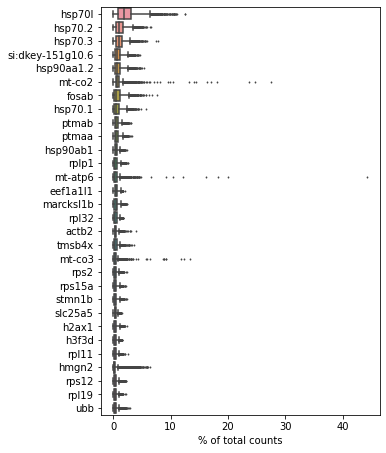

In [ ]:
sc.pl.highest_expr_genes(adata)

Biological context for highly expressed genes:

hsp70l, hsp70.2, hsp70.3 are generally upstream of many processes, and notably acts as a heat shock cognate in addition to enabling ATP activities. 

mt-co2 is a mitochondrial gene, cytochrome c oxidase 2. It acts upstream of ATP-synthesis coupled ETC activity, and it is expressed in the brain (which is to be expected of our brain sample.)

fosab refers to FBJ murine osteosarcoma viral oncogene Ab which contributes to dsDNA activity. It is expressed in several structures: heart, hematopoietic system, nervous system among the few.

hmgn2 refers to high mobility group nucleosomal binding domain, a protein-coding gene involved with chromatin binding and chromatin organization.

si:dkey-151g10.6 is associated with the ribosome and protein translation.

## Quality Control

### Basic Filtering

Our first important step in our analysis will be to do some quality control. Our 3 most important steps of quality control are:
- Basic filtering 
- Removal of highly expressed genes
- Batch Effect correction

In a standard scRNAseq experiment, there will be 4 steps, including removing MT reads. But of course, of spaceflight experiments, we at Genelab have decided to not include this step in our analysis.

***

Our analysis library of choice, scanpy, has a convient function that allows us calculate a number of quality metrics about the data. 

sc.pp.calculate_qc_metrics will give us 2 dataframes, a cell quality dataframe and a gene quality dataframe.

In [ ]:
# Quality control - calculate QC cmetrics
stats = sc.pp.calculate_qc_metrics(adata)
cell_qc_dataframe = stats[0]
gene_qc_dataframe = stats[1]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Lets take a quick look at the cell and gene qc dataframes.

In [ ]:
cell_qc_dataframe.head()

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCTGAGACCCACC-1,938,6.844815,1688.0,7.431892,25.770142,36.611374,51.303318,74.052133
AAACCTGAGGGCTTGA-1,1521,7.327781,3918.0,8.273592,26.978050,39.305768,53.318019,72.715671
AAACCTGAGTACGTAA-1,724,6.586172,1588.0,7.370860,32.682620,47.418136,63.539043,85.894207
AAACCTGAGTGAAGTT-1,1037,6.945051,2898.0,7.972121,37.370600,50.414079,64.389234,81.469979
AAACCTGCAAAGGTGC-1,510,6.236370,769.0,6.646390,29.908973,43.042913,59.687906,98.699610


In [ ]:
gene_qc_dataframe.head()

,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
fgfr1op2,684,0.078685,0.075743,92.504110,718.0,6.577861
si:dkey-21h14.12,0,0.000000,0.000000,100.000000,0.0,0.000000
si:dkey-285e18.2,0,0.000000,0.000000,100.000000,0.0,0.000000
znf1114,5,0.000548,0.000548,99.945205,5.0,1.791759
si:dkey-21h14.10,0,0.000000,0.000000,100.000000,0.0,0.000000


These metrics will be used to graph our quality control graphs to find thresholds.

***

In this case, there are no cells with a minimum number of genes from around 0-250, meaning there is no real filtering needed in this case.

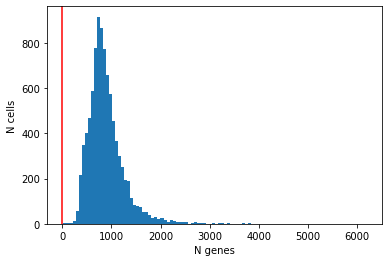

In [ ]:
fig, ax = plt.subplots()
plt.axvline(0, color='red')

plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.show()

Zooming in

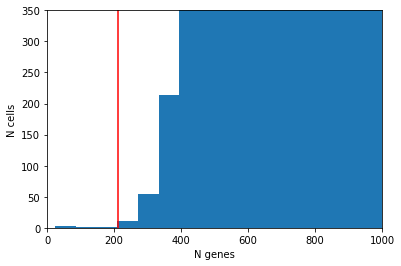

In [ ]:
fig, ax = plt.subplots()
plt.axvline(210, color='red')

plt.hist(cell_qc_dataframe['n_genes_by_counts'], bins=100)
plt.xlabel('N genes')
plt.ylabel('N cells')
plt.axis([0, 1000, 0, 350])
plt.show()

In this case, 210 will be a good threshold.

Our next order of business is to filter out genes that who have low expression levels across cells. It is important to do gene filtering after cell filtering because some genes may be detected only in low quality cells. 

Lets start by graphing cells vs the number of genes they express. 

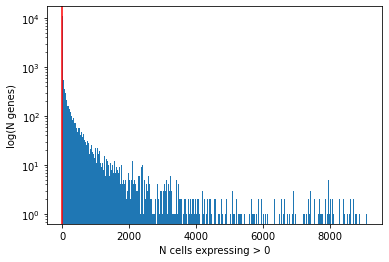

In [ ]:
fig, ax = plt.subplots()
plt.axvline(0, color='red')

plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.ylabel('log(N genes)') 
plt.yscale('log')
plt.show()

It seems as if most cells express a good number of genes, which we would expect as a cell. Lets take a closer look at at around zero.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


(0.0, 10.0, 0.6283541823060168, 100000.0)

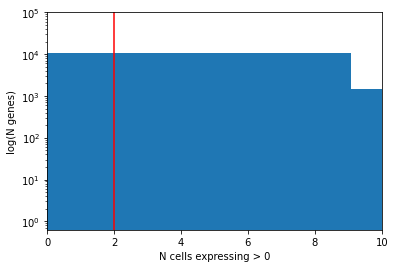

In [ ]:
plt.hist(gene_qc_dataframe['n_cells_by_counts'], bins=1000)
plt.xlabel('N cells expressing > 0')
plt.axvline(2, color='red')
plt.ylabel('log(N genes)') 
plt.yscale('log')
plt.axis([0, 10, 0, 100000])

In this case, 1 will be a good line for the threshold. 




For our defaults, because basic filtering be extremely variable throughout experiments, we have decided to keep defaults at 1% until user input after seeing graphs. However, in this experiment, it is not really necessary to do any cell filtering so we will change cell to 0 and and make gene filter at a flat 2.

In [ ]:
unfiltered_genes = adata.var_names
cell_filter_percentile = 0.01
gene_filter_percentile = 0.01

cell_filter_percentile = 0
gene_filter_percentile = 2


#### Filter

In [ ]:
if min_cells != 0 or min_genes != 0:             #User input filtering
  sc.pp.filter_cells(adata, min_genes = min_cells)
  sc.pp.filter_genes(adata, min_cells = min_genes)
else:                                            #Percentile-based filtering (default)
  stats = sc.pp.calculate_qc_metrics(adata)
  gene_counts_mean = np.mean(stats[0]['n_genes_by_counts'])
  cell_counts_mean = np.mean(stats[1]['n_cells_by_counts'])

  sc.pp.filter_cells(adata, min_genes = 210)
  sc.pp.filter_genes(adata, min_cells = 1)

In [ ]:
filtered_genes = np.setdiff1d(unfiltered_genes, adata.var_names)
print(str(len(filtered_genes))+" genes filtered")

5358 genes filtered


#### To compare filter results

Batch effect correction is a quality control method of lowering technical noise. It can help us visualize more complete clusters.

In [ ]:
# Review obs after draft is complete
if not batch_effect == None:
  sc.pp.pca(adata)
  sc.external.pp.harmony_integrate(adata, key=batch_effect)

### Normalize and Logarithmize Data

As its name suggests, sc.pp.normalize_total will normalize the total number of counts per cell so that every cell will have the same number of total counts. Normalization will help to preserve biological heterogeneity without the influence of any technical noise like sequencing depth and gene abundance.

target_sum = 1e6 here refers to counts per million. 

Although different methods of normalization does exist, that are more accurate and have better performance, the CPM method is more flexible and scalable to all datasets and pipelines making it the best choice for our Genelab pipeline.

sc.pp.log1p helps to logarithmize the data to improve data "symmetry" on a linear scale for more relevant and accurate data. For further information on this topic, feel free to check out the following link: https://blog.qbaseplus.com/seven-tips-for-bio-statistical-analysis-of-gene-expression-data

In [ ]:

sc.pp.normalize_total(adata,target_sum=1e6)
sc.pp.log1p(adata)

### Remove highly variable genes

Determine and remove highly variable genes based on each genes' mean and variance. Removing these genes eliminates noise due to high variability in the data.

Algorithm: Each gene is put into 20 'bins' based and their mean and variance. Each gene is then normalized based on the other genes in their bin. If a gene's normalized dispersion is greater or equal to a z-score of 2 (~98th percentile) AND the gene has a low mean cell count, it is marked highly variable.

Note: warning just means it will proceed to automatically calculate PCA since it was not done beforehand.

In [ ]:
sc.pp.highly_variable_genes(adata, flavor='seurat', min_disp=2)
highly_variable = adata[:, adata.var.highly_variable==True].var_names
print(str(len(adata.var[adata.var['highly_variable']==True]))+"/"+str(adata.n_vars)+" genes are highly variable")
adata = adata[:, adata.var.highly_variable==False]

342/19749 genes are highly variable


### K-Nearest Neighbors

Calculate the distance between each cell using the KNN algorithm. Distances will be used to cluster the cells in the next step.

Default (n=sqrt(adata.n_obs)): setting n as the square root of the length of the data is the general consensus if n is not provided.

Sources:

https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

https://discuss.analyticsvidhya.com/t/how-to-choose-the-value-of-k-in-knn-algorithm/2606/7

https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm

In [ ]:
sc.pp.neighbors(adata, n_neighbors=n)

         Falling back to preprocessing with `sc.pp.pca` and default params.


### Cluster

Cluster/Group each cell based on the distances calculated in the previous step using the Leiden algorithm.

'resolution' determines the amount of clusters that will be formed (default: 1.0. The higher the resolution, the more clusters in the result)

In [ ]:
sc.tl.leiden(adata, resolution=1.4)

## Visualize Results

Prepares the data to be visualized by simplifying multiple dimensions down to two dimensional coordinates using the UMAP algorithm. 

This algoithm also uses the distances calculated using 'neighbors()' 

In [ ]:
sc.tl.umap(adata)

### Clusters

Plot the UMAP data and color based on the clusters determined previously. We will later use label these clusters with cell types using marker gene identification.


... storing 'feature_types' as categorical


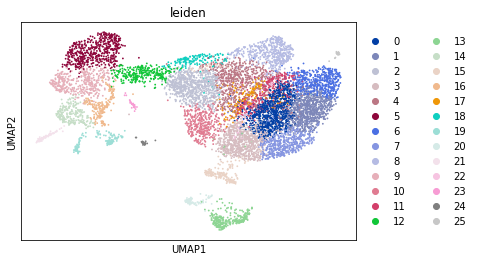

In [ ]:
sc.pl.umap(adata, color=['leiden'])

### Color based on selected gene(s)

Color cells based on their expression of a specific gene. If list of genes was not provided, the first 16 genes will be displayed.

Note: purple = no expression

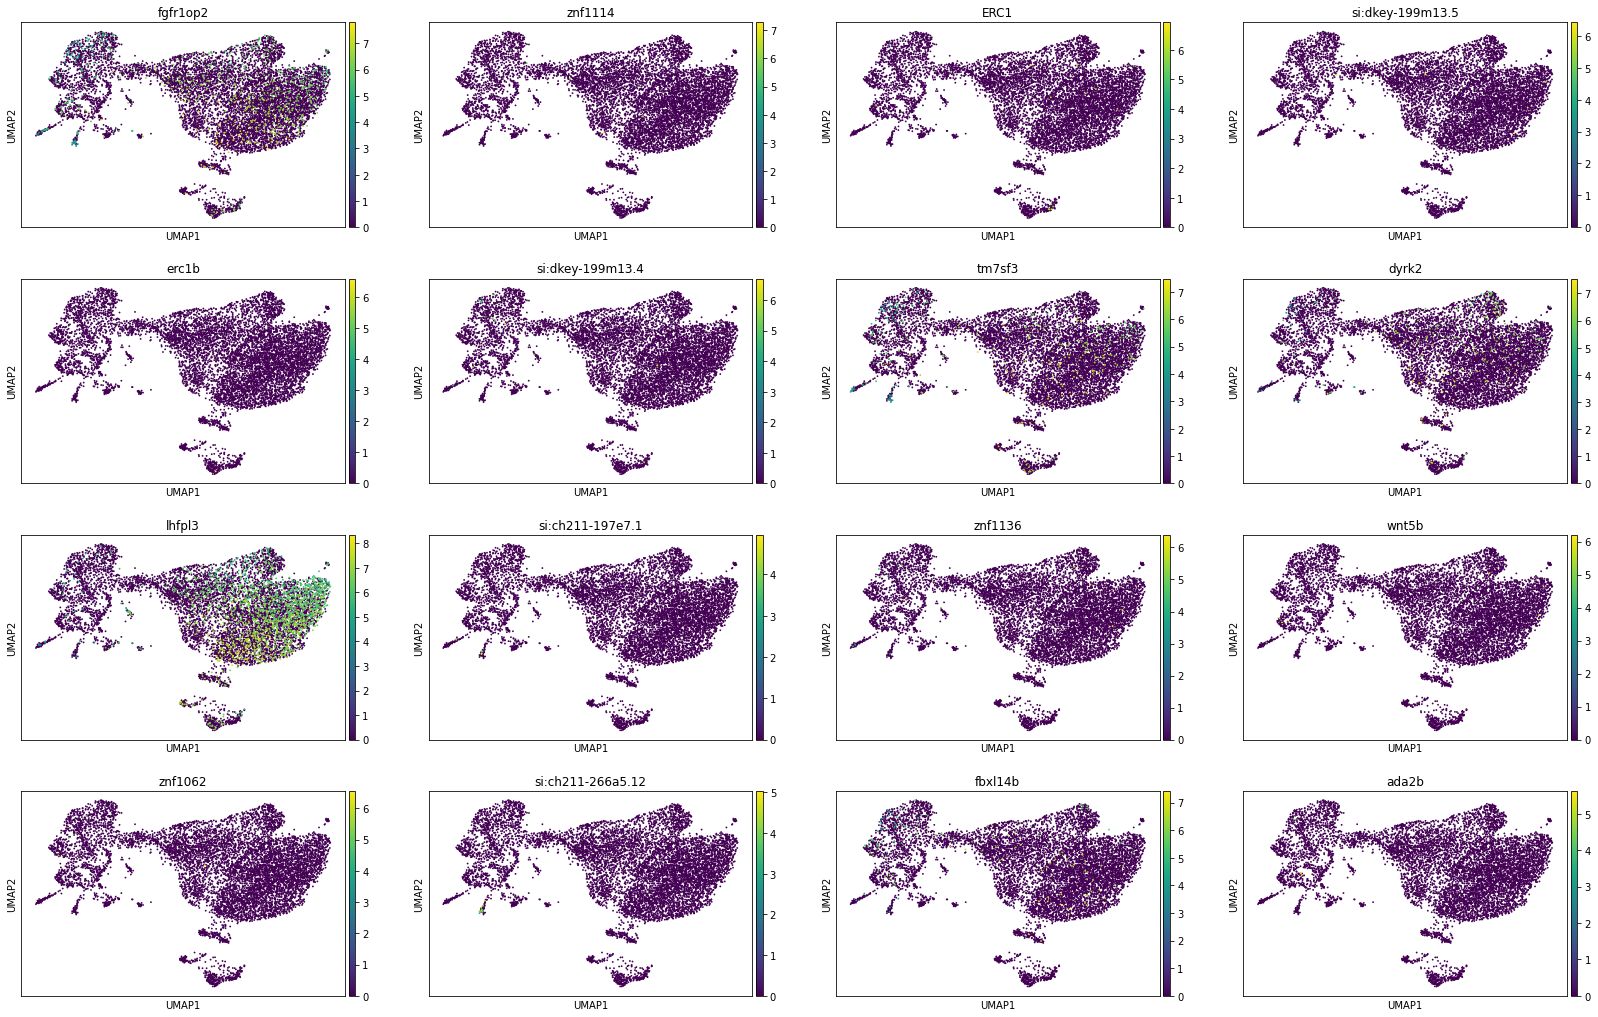

In [ ]:
view_genes = []
if len(genes) != 0:    #Display selected genes' expression
    for gene in genes:
        if gene in adata.var_names:
            view_genes.append(gene)
        elif gene in highly_variable:
            print(gene+" gene was highly variable and was filtered out.")
        elif gene in filtered_genes:
            print(gene+" gene had been filtered out.")
        else:
            print(gene+" gene does not exist in the dataset.")
else:                  #Display expression of the first 16 genes in adata
    #View the first 16 genes
    view_genes = []
    i = 16
    for gene in adata.var_names:
        view_genes.append(gene)
        i -= 1
        if i==0: break

sc.pl.umap(adata, color=view_genes)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


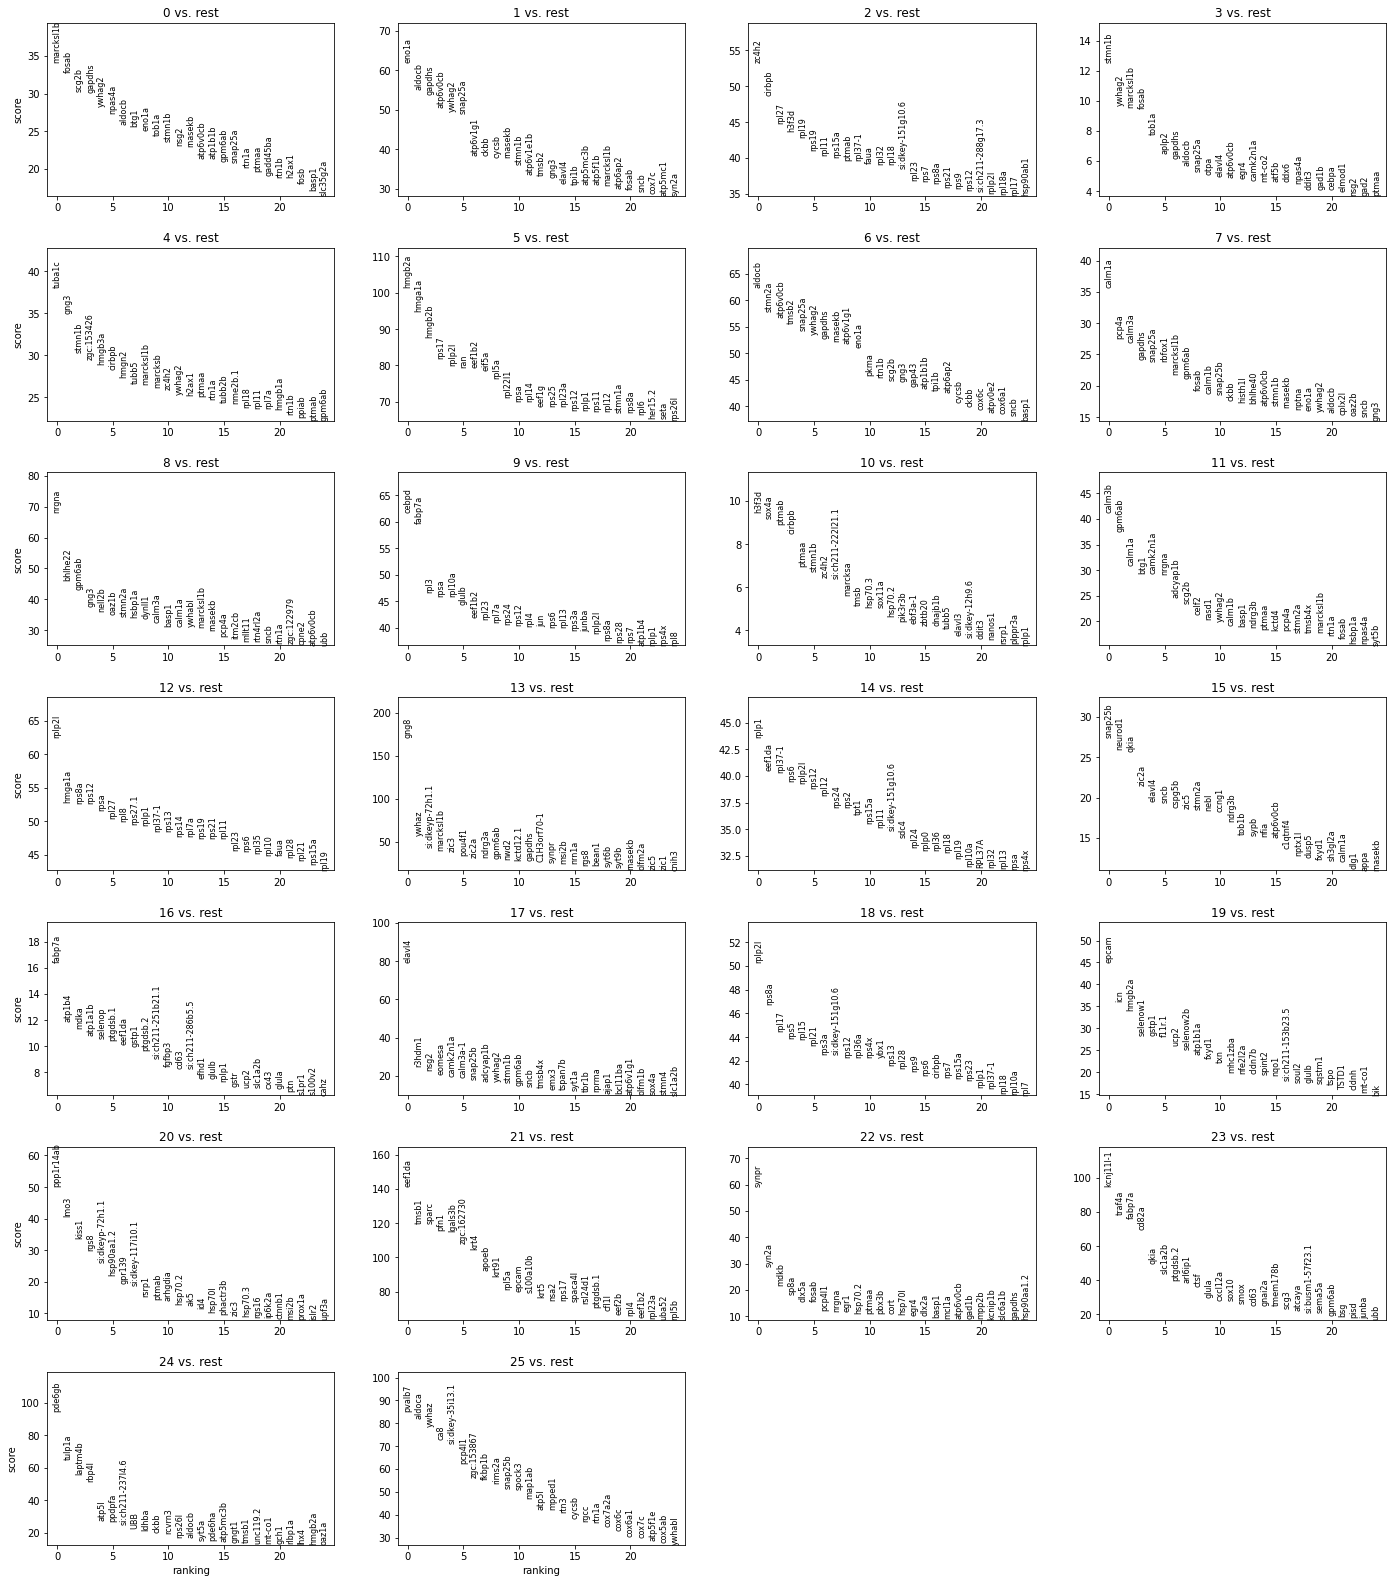

In [ ]:
results_file = 'write/danio_rerio.h5ad'
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [ ]:
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,marcksl1b,eno1a,zc4h2,stmn1b,tuba1c,hmgb2a,aldocb,calm1a,nrgna,cebpd,h3f3d,calm3b,rplp2l,gng8,rplp1,snap25b,fabp7a,elavl4,rplp2l,epcam,ppp1r14ab,eef1da,synpr,kcnj11l-1,pde6gb,pvalb7
1,fosab,aldocb,cirbpb,ywhag2,gng3,hmga1a,stmn2a,pcp4a,bhlhe22,fabp7a,sox4a,gpm6ab,hmga1a,ywhaz,eef1da,neurod1,atp1b4,r3hdm1,rps8a,icn,lmo3,tmsb1,syn2a,traf4a,tulp1a,aldoca
2,scg2b,gapdhs,rpl27,marcksl1b,stmn1b,hmgb2b,atp6v0cb,calm3a,gpm6ab,rpl3,ptmab,calm1a,rps8a,si:dkeyp-72h1.1,rpl37-1,qkia,mdka,nsg2,rpl17,hmgb2a,kiss1,sparc,mdkb,fabp7a,laptm4b,ywhaz
3,gapdhs,atp6v0cb,h3f3d,fosab,zgc:153426,rps17,tmsb2,gapdhs,gng3,rpsa,cirbpb,btg1,rps12,marcksl1b,rps6,zic2a,atp1a1b,eomesa,rps5,selenow1,rgs8,pfn1,sp8a,cd82a,rbp4l,ca8
4,ywhag2,ywhag2,rpl19,tob1a,hmgb3a,rplp2l,snap25a,snap25a,nell2b,rpl10a,ptmaa,camk2n1a,rpsa,zic3,rplp2l,elavl4,selenop,camk2n1a,rpl15,gstp1,si:dkeyp-72h1.1,lgals3b,dlx5a,qkia,atp5l,si:dkey-35i13.1
5,npas4a,snap25a,rps19,aplp2,cirbpb,ran,ywhag2,rbfox1,oaz1b,glulb,stmn1b,nrgna,rpl27,pou4f1,rps12,sncb,ptgdsb.1,calm3a-1,rpl21,f11r.1,hsp90aa1.2,zgc:162730,fosab,slc1a2b,ppdpfa,pcp4l1
6,aldocb,atp6v1g1,rpl11,gapdhs,hmgn2,eef1b2,gapdhs,marcksl1b,stmn2a,eef1b2,zc4h2,adcyap1b,rpl8,zic2a,rpl12,cspg5b,eef1da,snap25b,rps3a,ucp2,gpr139,krt4,pcp4l1,ptgdsb.2,si:ch211-237l4.6,zgc:153867
7,btg1,ckbb,rps15a,aldocb,tubb5,eif5a,rnasekb,gpm6ab,hsbp1a,rpl23,si:ch211-222l21.1,scg2b,rps27.1,ndrg3a,rps24,zic5,gstp1,adcyap1b,si:dkey-151g10.6,selenow2b,si:dkey-117i10.1,apoeb,nrgna,arl6ip1,UBB,fkbp1b
8,eno1a,cycsb,ptmab,snap25a,marcksl1b,rpl5a,atp6v1g1,fosab,dynll1,rpl7a,marcksa,celf2,rplp1,gpm6ab,rps2,stmn2a,ptgdsb.2,ywhag2,rps12,atp1b1a,rsrp1,krt91,egr1,ctsf,ldhba,rims2a
9,tob1a,rnasekb,rpl37-1,otpa,marcksb,rpl22l1,eno1a,calm1b,calm3a,rps24,tmsb,rasd1,rpl37-1,nwd2,tpt1,nebl,si:ch211-251b21.1,stmn1b,rpl36a,fxyd1,ptmab,rpl5a,hsp70.2,glula,ckbb,snap25b


#Annotation

In [ ]:
!git clone https://github.com/LucasESBS/scoreCT

Cloning into 'scoreCT'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 197 (delta 3), reused 12 (delta 3), pack-reused 185
Receiving objects: 100% (197/197), 114.10 MiB | 41.76 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
!mv scoreCT/src/scorect_api.py /content/

In [ ]:
import scorect_api as ct

In [ ]:
ref_marker = ct.read_markers_from_file("scoreCT/data/Danio_rerio_genes_corrected.csv")

In [ ]:
sc.tl.rank_genes_groups(adata, groupby='leiden', n_genes=len(adata.var))

In [ ]:
marker_df = ct.wrangle_ranks_from_anndata(adata)
print(marker_df.head())

Wrangling: Number of markers used in ranked_gene_groups:  19407
Wrangling: Groups used for ranking: leiden
     z_score      adj_pvals       gene cluster_number
0  34.106575  6.751312e-217  marcksl1b              0
1  32.751667  1.171634e-189      fosab              0
2  30.269196  5.155392e-148      scg2b              0
3  30.162380  6.428518e-168     gapdhs              0
4  28.229740  3.842279e-140     ywhag2              0


In [ ]:
# Let's set parameters first: K = number of genes included in the ranking
# m = number of bins used to divide the top K genes.
K = 300
m = 15
# all genes in DGE test
background = adata.var.index.tolist()
# function run
ct_pval, ct_score = ct.celltype_scores(nb_bins=m,
                                        ranked_genes=marker_df,
                                        K_top = K,
                                        marker_ref=ref_marker,
                                        background_genes=background)

In [ ]:
cluster_assign = adata.obs['leiden']
celltype_assign = ct.assign_celltypes(cluster_assignment=cluster_assign, ct_pval_df=ct_pval, ct_score_df=ct_score, cutoff=0.1)
# Add to anndata object
#adata.obs['scorect'] = celltype_assign
#sc.pl.umap(adata, color=['cell_type','scorect'], title=['True','Predicted'], cmap='Set2')

In [ ]:
adata.obs['cell_type'] = celltype_assign

In [ ]:
adata.obs.head()

,n_genes,leiden,cell_type
AAACCTGAGACCCACC-1,938,17,differentiating neurons - eomesa.1
AAACCTGAGGGCTTGA-1,1521,19,epidermal - acbd7
AAACCTGAGTACGTAA-1,724,2,differentiating neurons - dlx.1
AAACCTGAGTGAAGTT-1,1037,4,differentiating neuron
AAACCTGCAAAGGTGC-1,510,3,differentiating neuron


In [ ]:
adata.obs.to_excel('d_rerio_annotation.xlsx')

... storing 'cell_type' as categorical


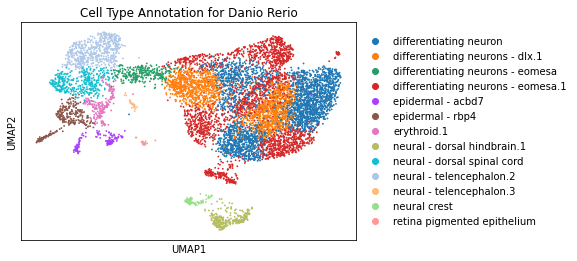

In [ ]:
sc.pl.umap(adata, color=['cell_type'], title=['Cell Type Annotation for Danio Rerio'])